# seaborn 데이터 시각화 1
- matplotlib을 더 쉽게 사용할 수 있도록 만든 라이브러리
- pip install seaborn

[관련 문서들 참고]

- [matplot pyplot 공식 도큐먼트 살펴보기](https://matplotlib.org/stable/gallery/index.html)  
- [seaborn 공식 도큐먼트 살펴보기](https://seaborn.pydata.org/examples/index.html)  
- [seaborn 내장 데이터셋](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#)  
- [seaborn 디지털 도서](https://wikidocs.net/86290)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

In [3]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [127]:
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

## 0. Seaborn의 장점
matplotlib으로 대부분의 시각화가 가능하나, <span style="background-color:#F5F5F5"> seaborn </span>
을 사람들이 선하는 이유

### 0-1. seaborn에서만 제공되는 통계 기반 plot

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### tips 데이터 정보
- total_bill: 총 합계 요금표
- tip: 팁
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

In [6]:
# 컬럼 이름 변경하고 파일로 저장하기
tips = tips.rename(columns={"sex": "gender"})
import os
path = "datas"
if not os.path.exists(path):
    os.mkdir(path)
tips.to_csv(f"{path}/sns_tips.csv", index=False)

In [7]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


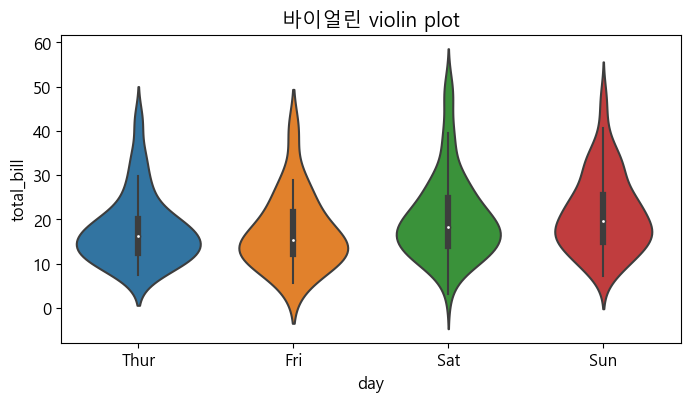

In [8]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title('바이얼린 violin plot')
plt.show()

In [9]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

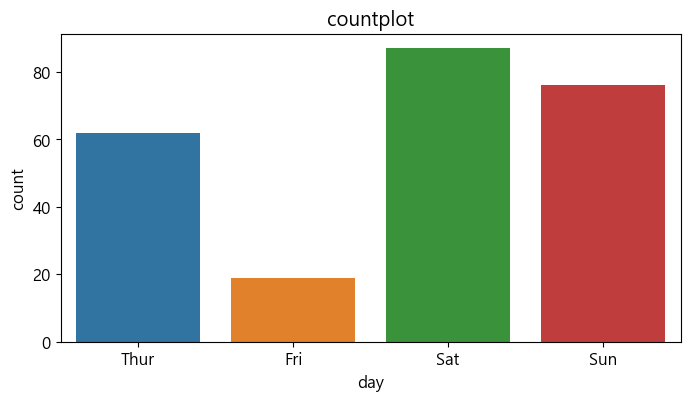

In [10]:
sns.countplot(x=tips['day'])
plt.title('countplot')
plt.show()

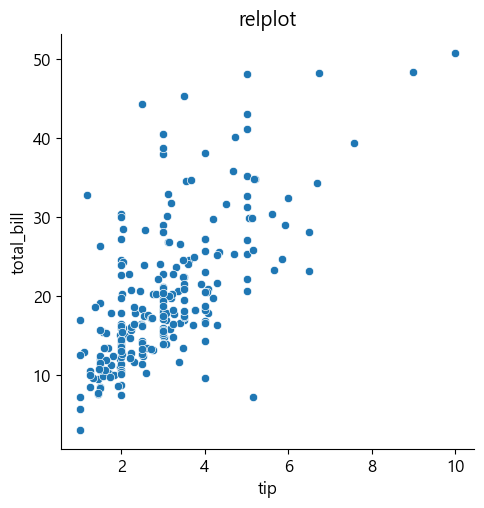

In [11]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

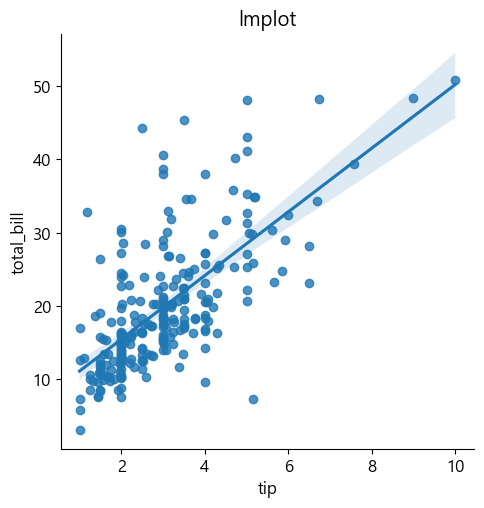

In [12]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.title('lmplot')
plt.show()

In [13]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
 tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 0-2. 아름다운 스타일링
seaborn의 최대 장점 중 하나인, 아름다운 컬러팔레트  
<span style="background-color:#F5F5F5"> matplotlib </span>의 기본 컬러 색상보다 <span style="background-color:#F5F5F5"> seaborn</span>은 스타일링에 크게 신경을 쓰지 않아도 **default 컬러가 예쁘게 조합** 됨

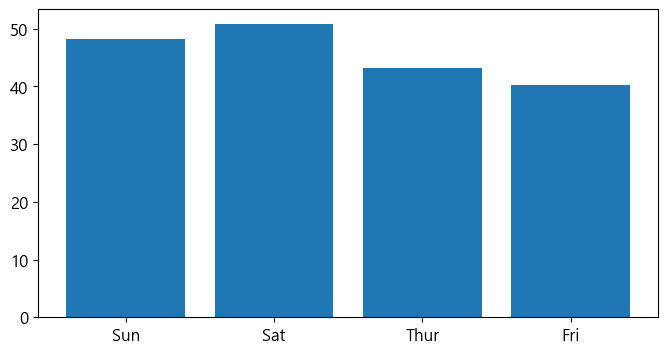

In [15]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

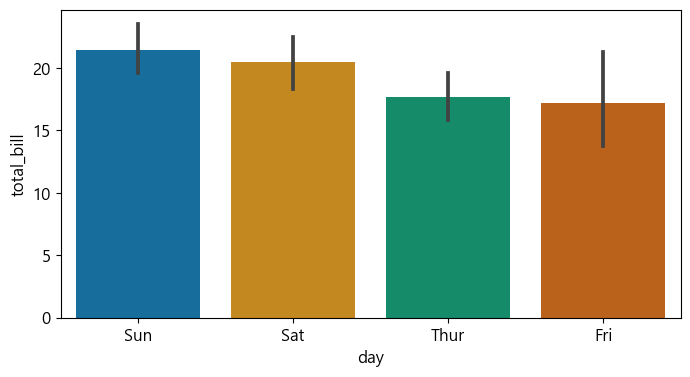

In [16]:
sns.barplot(x="day", y="total_bill", data=tips, palette='colorblind')
plt.show()

### 0-3. 컬러 팔레트

자세한 컬러팔레트는 공식 도큐먼트 참고

[Seaborn의 컬러팔레트](https://seaborn.pydata.org/tutorial/color_palettes.html)

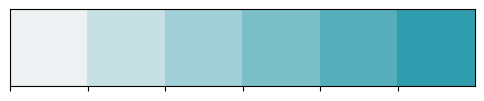

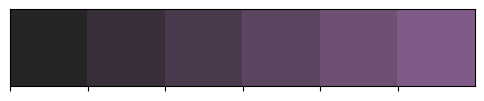

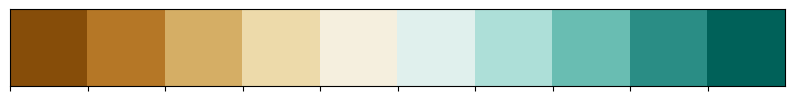

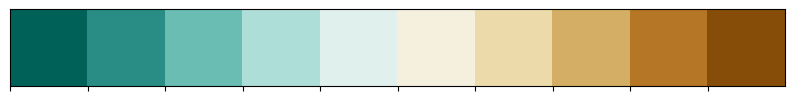

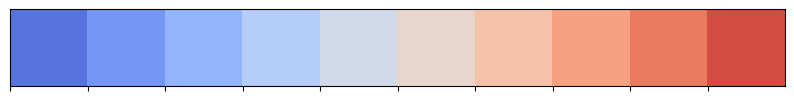

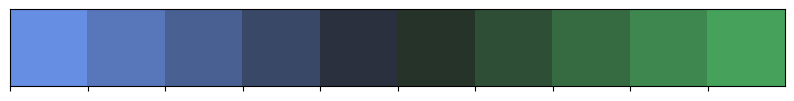

In [17]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

<Axes: xlabel='tip', ylabel='total_bill'>

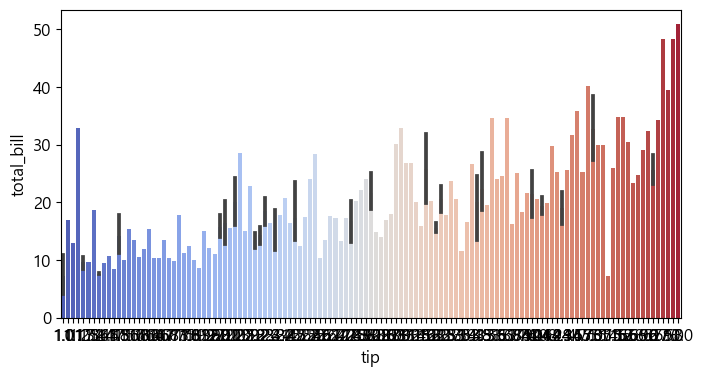

In [18]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='coolwarm')

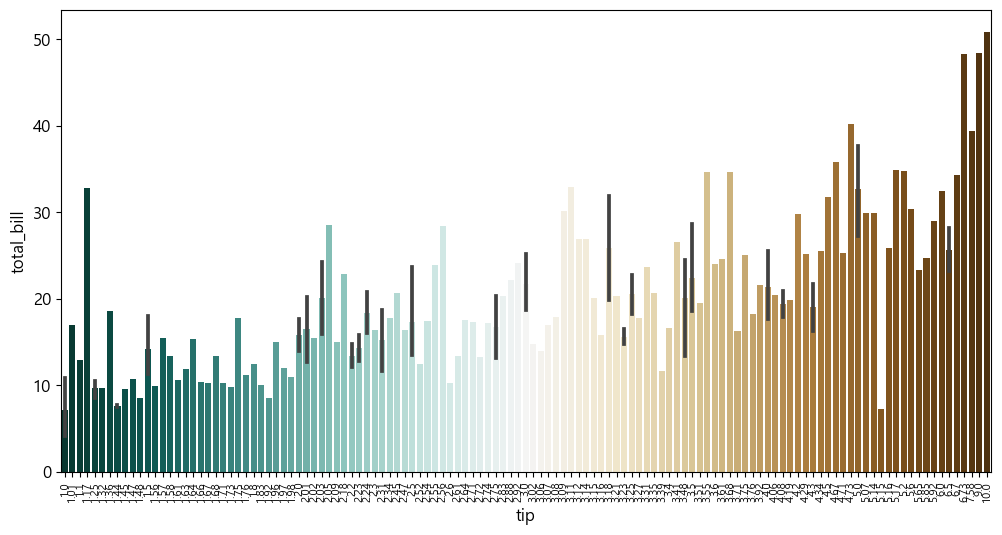

In [19]:
plt.figure(figsize=(12, 6))

sns.barplot(x="tip", y="total_bill", data=tips, palette='BrBG_r')
# x축 틱 레이블 각도 변경
plt.xticks(rotation=90, fontsize=8)
plt.show()

### 0-4. pandas 데이터프레임과 높은 호환성

In [20]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


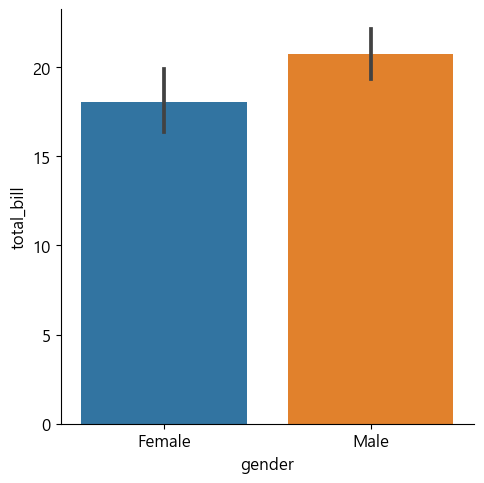

In [21]:
sns.catplot(x="gender", y="total_bill", 
            data=tips, 
            kind="bar")
plt.show()

<span style="background-color:#F5F5F5"> hue </span> 
  옵션으로 bar를 구분

- xtick, ytick, xlabel, ylabel을 알아서 생성해 줌
- legend 까지 자동으로 생성함
- 신뢰 구간도 알아서 계산하여 생성

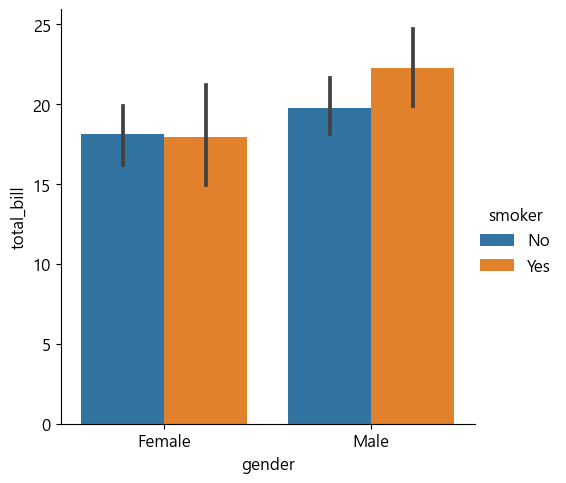

In [22]:
sns.catplot(x="gender", y="total_bill",
            hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

<span style="background-color:#F5F5F5"> col </span>옵션 하나로 그래프 자체를 분할해 줌

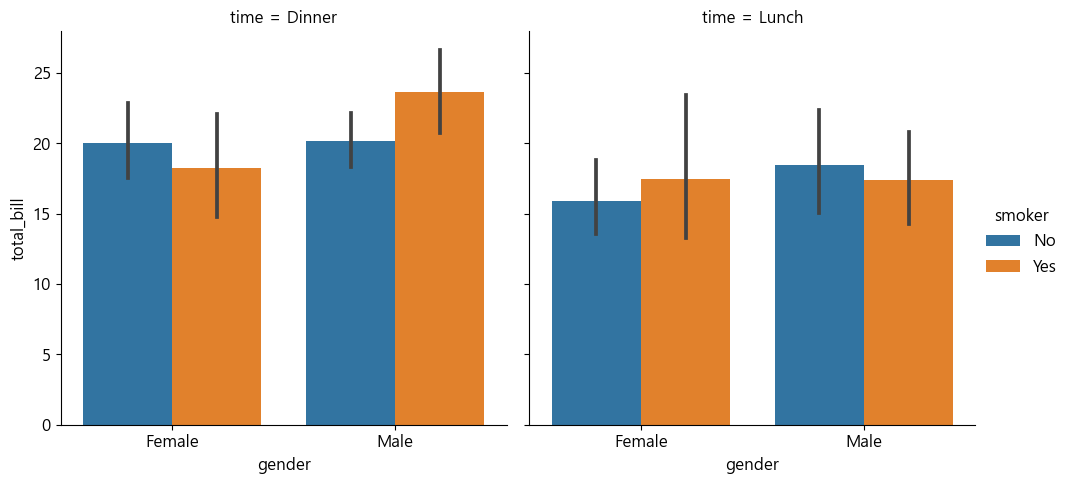

In [23]:
sns.catplot(x="gender", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="bar")
plt.show()

### 상관관계 계수 heatmap 시각화
- heatmap으로 시각화할 대상 컬럼은 모두 숫자로 되어있어야함.
- 상관관계 계수를 적용하기 범주형 데이터를 숫자로 변경하기

## [문제] 범주형 데이터를 label로 인코딩하기
- 범주형 데이터 컬럼을 찾기
- 범주형 컬럼의 values 확인
- 범주형 values -> 숫자로 변환

In [86]:
# 데이터 준비
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
# 범주형 데이터인 'gender', 'smoker', 'day', 'time' 열에 레이블 인코딩 적용
tips_copy = tips.copy()
print(tips_copy[["gender", "smoker", "day", "time"]].value_counts())
mapping = {
    "Female" : 0,
    "Male": 1
}
tips_copy["gender"] = tips_copy["gender"].map(mapping)
mapping = {
    "No" : 0,
    "Yes" : 1
}
tips_copy["smoker"] = tips_copy["smoker"].map(mapping)
mapping = {
    "Sun" : 0,
    "Sat" : 1,
    "Thur" : 2,
    "Fri" : 3
}
tips_copy["day"] = tips_copy["day"].map(mapping)
mapping = {
    "Dinner" : 0,
    "Lunch" : 1
}
tips_copy["time"] = tips_copy["time"].map(mapping)
tips = tips_copy

gender  smoker  day   time  
Male    No      Sun   Dinner    43
                Sat   Dinner    32
        Yes     Sat   Dinner    27
Female  No      Thur  Lunch     24
Male    No      Thur  Lunch     20
        Yes     Sun   Dinner    15
Female  Yes     Sat   Dinner    15
        No      Sun   Dinner    14
                Sat   Dinner    13
Male    Yes     Thur  Lunch     10
Female  Yes     Thur  Lunch      7
Male    Yes     Fri   Dinner     5
Female  Yes     Sun   Dinner     4
                Fri   Dinner     4
                      Lunch      3
Male    Yes     Fri   Lunch      3
        No      Fri   Dinner     2
Female  No      Fri   Lunch      1
                Thur  Dinner     1
                Fri   Dinner     1
Name: count, dtype: int64


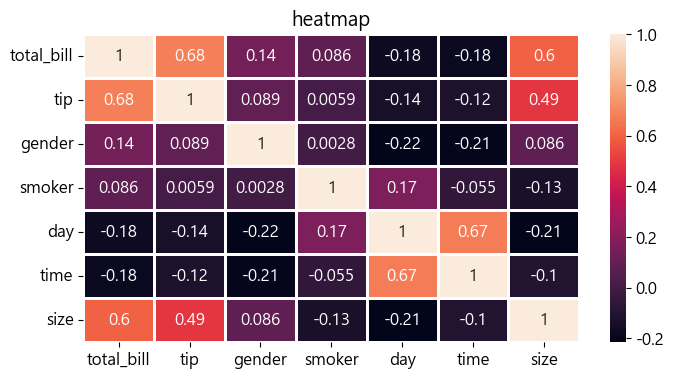

In [63]:
plt.title('heatmap')
sns.heatmap(tips_copy.corr(), annot=True, linewidths=1)
plt.show()

- data: 히트맵을 그릴 데이터셋, 2차원 배열 형태의 데이터를 입력받음
- annot: 히트맵 셀에 숫자 값을 표시할지 여부를 나타내는 부울값 또는 데이터 배열, 기본값은 False로 숫자 값이 표시되지 않음
- fmt: annot이 True로 설정된 경우 숫자 형식을 지정함, 예를 들어 ".2f"는 소수점 이하 2자리까지 표시하도록 지정함
- cmap: 히트맵의 색상 맵 지정, 예를 들어 "coolwarm", "viridis", "RdYlBu" 등 다양한 색상 맵을 사용할 수 있음
    - viridis: 영역별로 색상이 연속적으로 변화하는 색상 맵
    - plasma: 연속적인 분홍색과 청록색을 갖는 색상 맵
    - inferno: 연속적인 주황색과 검은색을 갖는 색상 맵
    - magma: 연속적인 검은색과 청록색을 갖는 색상 맵입
    - coolwarm: 차가운 색상과 따뜻한 색상이 교대로 나타나는 색상 맵
    - RdBu: 붉은색과 청록색이 교대로 나타나는 색상 맵
    - YlGnBu: 노란색, 녹색, 청록색, 파란색이 연속적으로 변화하는 색상 맵
- linewidths: 히트맵 셀 사이의 경계선 두께 지정
- linecolor: 히트맵 셀 사이의 경계선 색상을 지정
- cbar: 컬러바를 표시할지 여부를 나타내는 부울값임. 기본값은 True로 컬러바가 표시됨
- vmin, vmax : 컬러바의 범위 지정

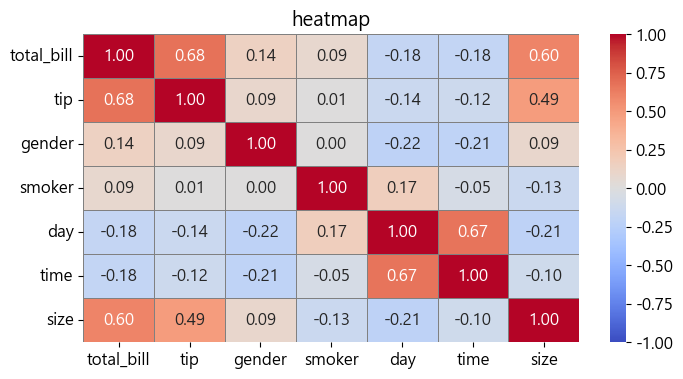

In [64]:
plt.title('heatmap')
sns.heatmap(tips.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()

##### 강사님 코드

In [87]:
tips_inst = tips.copy()

In [88]:
tips_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [89]:
# 범주형 데이터 확인
tips_inst.select_dtypes(include="object").columns

Index(['gender', 'smoker', 'day', 'time'], dtype='object')

In [90]:
# 범주형 데이터 컬럼의 값 확인 : values_counts()
# gender column 확인
tips_inst["gender"].value_counts().sort_index()
tips_inst["day"].value_counts().sort_index()
tips_inst["time"].value_counts().sort_index()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [91]:
# mapping 정의
mapping = {
    "Female"  :  0,
    "Male"     : 1
}
tips_inst["gender"] = tips_inst["gender"].map(mapping)
mapping = {
    "No" : 0,
    "Yes" : 1
}
tips_inst["smoker"] = tips_inst["smoker"].map(mapping)
mapping = {
    "Fri"  :   0,
    "Sat"   :  1,
    "Sun"    : 2,
    "Thur"    : 3
}
tips_inst["day"] = tips_inst["day"].map(mapping)
mapping = {
    "Dinner"  :  0,
    "Lunch"   :  1
}
tips_inst["time"] = tips_inst["time"].map(mapping)

In [92]:
tips_inst.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

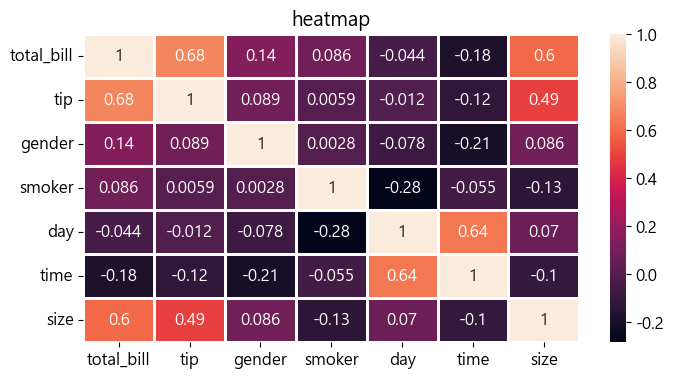

In [93]:
plt.title('heatmap')
sns.heatmap(tips_inst.corr(), annot=True, linewidths=1)
plt.show()

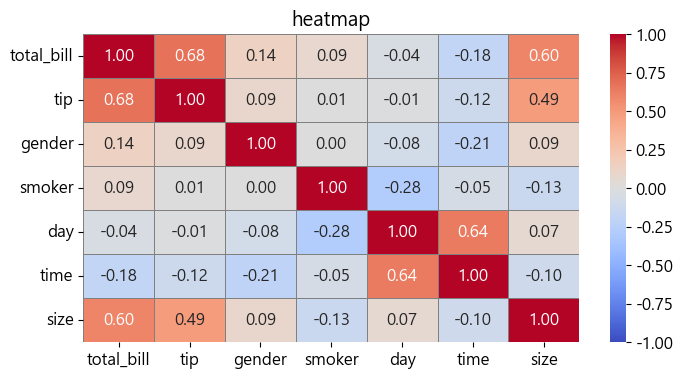

In [95]:
plt.title('heatmap')
sns.heatmap(tips_inst.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()

## 1. Scatterplot
### 데이터 준비
0 ~ 1 사이의 임의의 랜덤한 값을 생성함

In [65]:
np.random.rand(50)

array([0.24948046, 0.13540521, 0.60777294, 0.5131305 , 0.5491352 ,
       0.3506646 , 0.50916381, 0.70389763, 0.44812292, 0.92350375,
       0.17166028, 0.07768965, 0.53881839, 0.30517762, 0.23833356,
       0.55908566, 0.52261407, 0.84997272, 0.46268742, 0.54205768,
       0.01999209, 0.46262134, 0.23492298, 0.34306107, 0.37417934,
       0.98291887, 0.22507955, 0.94602804, 0.79526614, 0.83368445,
       0.24096301, 0.88685415, 0.73959436, 0.1201478 , 0.39394778,
       0.45800943, 0.87384702, 0.99287982, 0.66578601, 0.57159541,
       0.18726424, 0.09710922, 0.24075489, 0.59900251, 0.46924   ,
       0.14381767, 0.24785095, 0.070826  , 0.7498774 , 0.73202479])

In [5]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### 1-1. x, y, colors, area 설정하기
- colors 는 임의 값을 color 값으로 변환합니다.
- area는 점의 넓이를 나타냅니다. 값이 커지면 당연히 넓이도 커집니다.

In [6]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

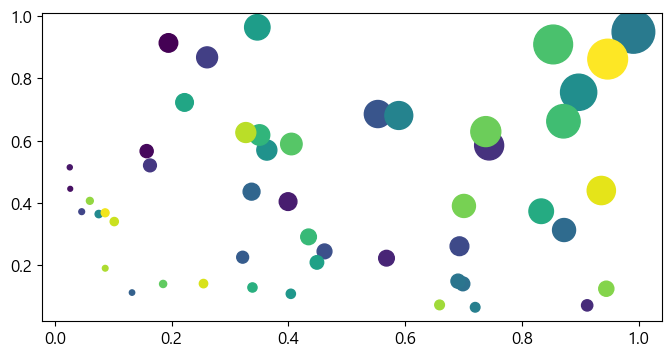

In [7]:
# matplotlib의 산점도 그래프
plt.scatter(x, y, s=area, c=colors)
plt.show()

- seaborn 에서는 <span style="background-color:#fff5b1"> size </span>와 <span style="background-color:#fff5b1"> sizes </span>를 동시에 지정할 수 있음
- <span style="background-color:#fff5b1"> sizes </span> 옵션에서는 사이즈의 min, max를 명시함
- <span style="background-color:#fff5b1"> hue </span>는 컬러 옵션임
- <span style="background-color:#fff5b1"> palette </span>를 통해 seaborn이 제공하는 아름다운 palette 사용 가능
    - Set1, Set2, deep, muted, bright, pastel, dark, colorblind, rocket, viridis, plasma, inferno, cividis, coolwarm, RdBu, husl, gist_gray

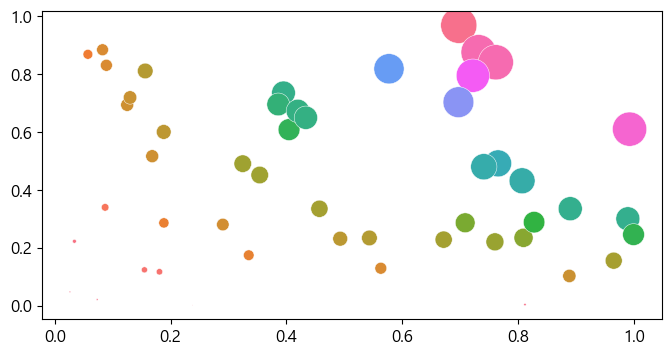

In [30]:
x = np.random.rand(50) # rand(n)에서 x와 y 값이 같아야 함
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), hue=area, palette='husl', legend=False)
plt.show()

## tips 데이터를 활용한 산점도 시각화

In [9]:
# Sample dataset
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)

### "total_bill"과 "tip" 간의 관계를 시각화
- 식당에서 총 지불한 금액과 팁 금액간의 관계와 금액 분포 시각화

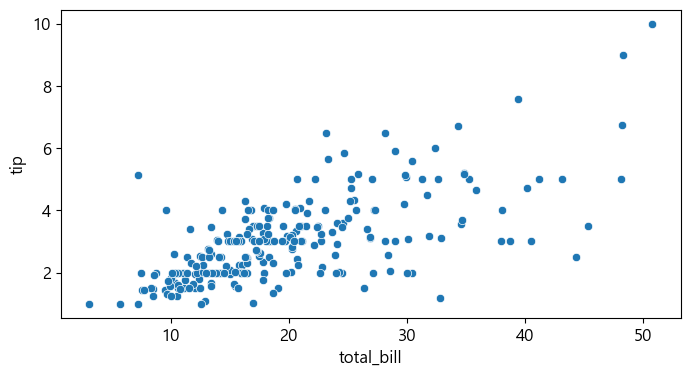

In [10]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

# 그래프 출력
plt.show()

[설명]

- 지불 금액이 높을수록 팁도 증가하는 경향을 보임
- 식당의 total_bill이 10 ~ 30사이에 많이 분포하고, 팀은 1~5사이에 많이 분포한다는 것을 알 수 있음

In [11]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 지불 금액과 팁 사이의 관계를 시간, 성별, 그리고 식사 인원 수와 같은 추가적인 요인에 따라 시각화
- 각 요소 간의 관계 파악하기

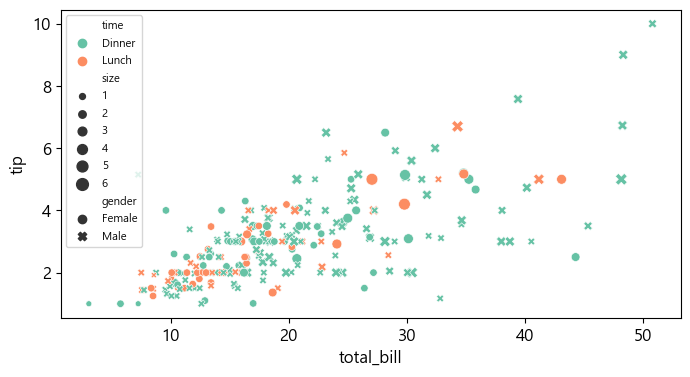

In [20]:
# Scatter plot : 
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="gender", size="size", palette="Set2")

# legend 사이즈
plt.legend(prop={'size': 8})
# Display the plot
plt.show()

[설명]

- "total_bill"과 "tip" 간의 관계: 일반적으로 지불 금액이 높을수록 팁도 커지는 경향이 있음

- "time"(점심, 저녁)에 따른 분류:

    - 식사 시간 Dinner와 Lunch 시간에 따라 "total_bill"과 "tip"의 관계가 다른 것을 알 수 있음
    - 점심과 저녁 시간대에서의 팁의 분포가 다름
    - 저녁 시간일 수록 지불금액과 팁이 높아지는 경향성이 있음
- "gender"(남,여)에 따른 분류

    - 토탈 지불금액이 커질 수록 남자들이 좀더 많은 팁을 지불함
    - 남자들이 좀더 높을 금액의 total_bill을 지불하고, 그에 따른 높은 팁을 주는 경향이 있음
- "size"(식사인원수)에 따른 분류:

    - 포인트의 크기는 식사 인원 수
    - "size"에 따라"total_bill"과 "tip"의 관계가 다른 것을 확인할 수 있음
    - 인원 수가 많을수록 지불 금액과 팁의 크기가 증가함.

### 1-2. 다중 그래프 그리기
- 1개의 canvas 안 여러개 그래프 그리기

- alpha
    - alpha값은 투명도를 나타냄
    - 0 ~ 1 사이의 값 지정
    - 0에 가까울 수록 투명한 값을 가짐

In [13]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

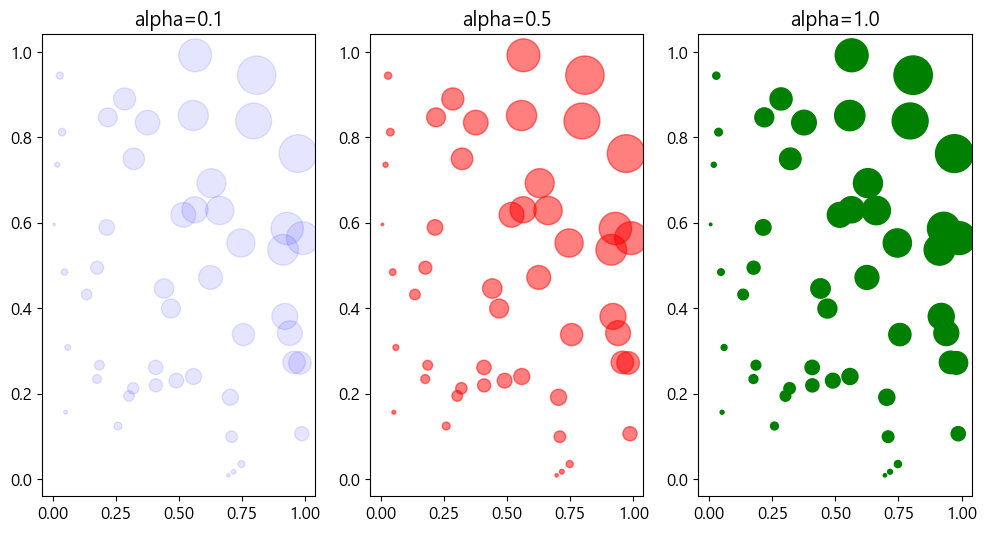

In [14]:
#  matplotlib subplot 산점도 
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(x, y, s=area, c='blue', alpha=0.1)
plt.title('alpha=0.1')
plt.subplot(132)
plt.title('alpha=0.5')
plt.scatter(x, y, s=area, c='red', alpha=0.5)
plt.subplot(133)
plt.title('alpha=1.0')
plt.scatter(x, y, s=area, c='green', alpha=1.0)

plt.show()

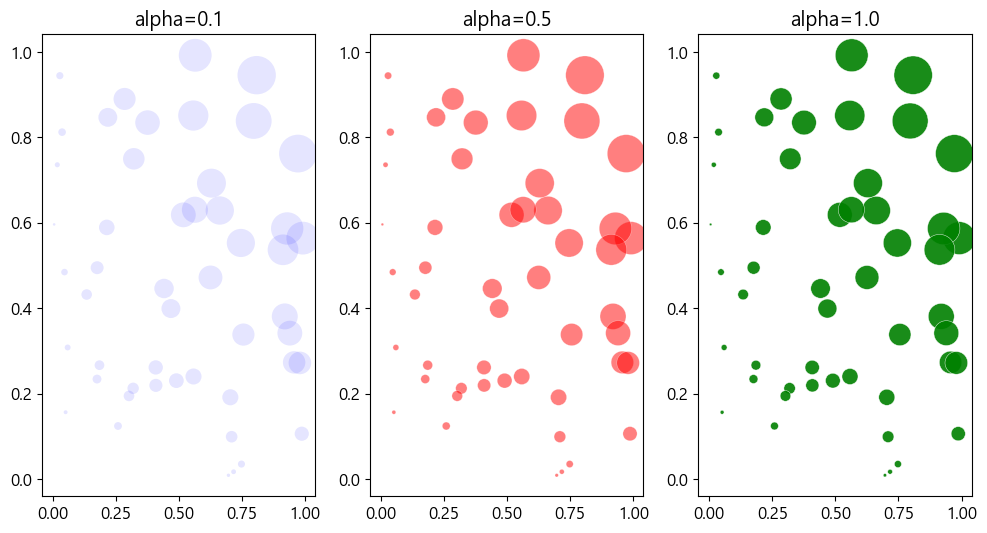

In [15]:
# seaborn으로 subplot 산점도 그래프
plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='blue', alpha=0.1, legend=False)
plt.title('alpha=0.1')

plt.subplot(132)
plt.title('alpha=0.5')
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='red', alpha=0.5, legend=False)

plt.subplot(133)
plt.title('alpha=1.0')
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='green', alpha=0.9, legend=False)

plt.show()

## 2. Barplot, Barhplot

### 2-1. 기본 Barplot 그리기
#### matplotlib bar 차트 그리기

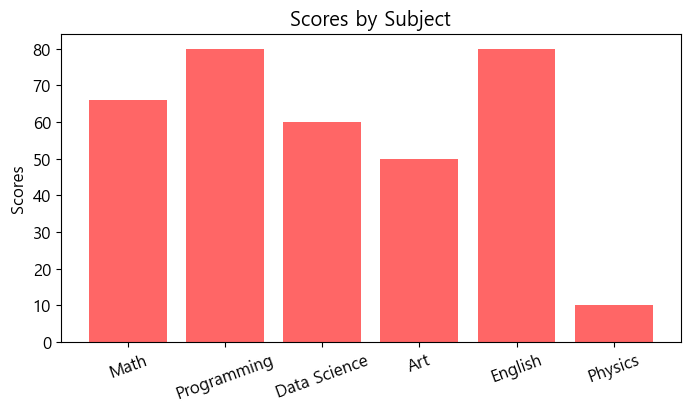

In [16]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

plt.bar(subject, score, align='center', alpha=0.6, color='red')

plt.xticks(rotation=20)
plt.ylabel('Scores')
plt.title('Scores by Subject')

plt.show()

#### seaborn으로 bar 차트 그리기

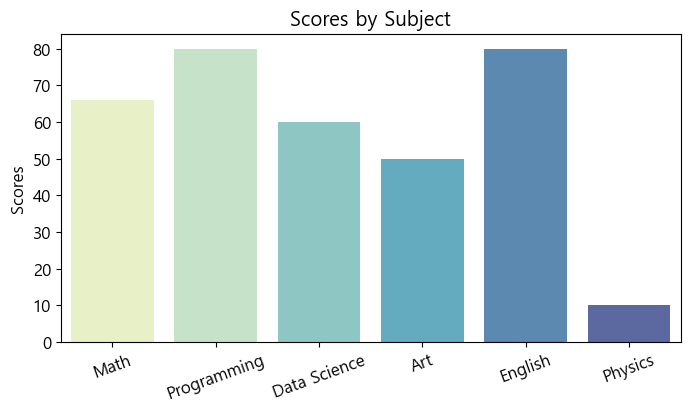

In [17]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

sns.barplot(x=subject, y=score, alpha=0.8, palette='YlGnBu')

plt.xticks(rotation=20)
plt.ylabel('Scores')
plt.title('Scores by Subject')

plt.show()

### 2-2. 기본 Barhplot 그리기
barh 함수에서는 xticks로 설정했던 부분을 yticks로 변경합니다.

#### matplotlib으로 barh 차트 그리기

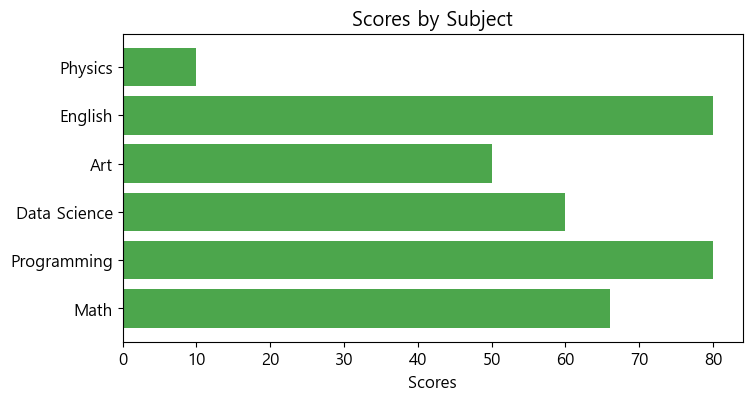

In [31]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

plt.barh(subject, score, align='center', alpha=0.7, color='green')
plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

#### seaborn으로 barh 차트 그리기

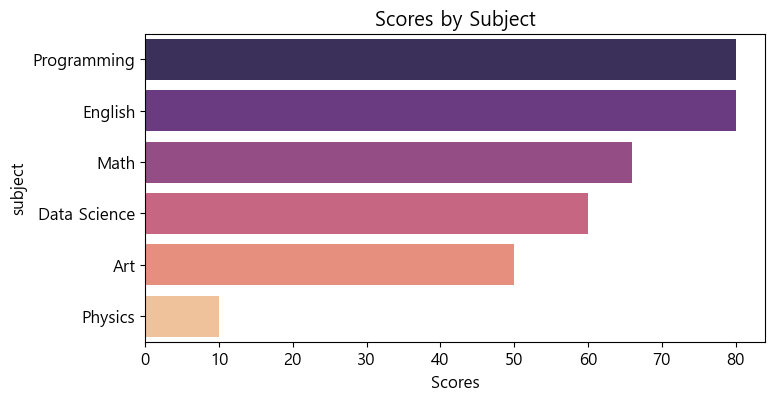

In [42]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]
seaborn_bar = pd.DataFrame(zip(subject, score), columns=["subject", "score"])
seaborn_bar = seaborn_bar.sort_values(by="score", ascending=False)
# print(seaborn_bar)

# x, y 축 대입값을 바꿔서 표현
sns.barplot(x=seaborn_bar["score"], y=seaborn_bar["subject"], alpha=0.9, palette='magma')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

#### 차트 결과 높은 값 순으로 표시하기
방법1. 리스트를 소팅하여 차트 적용

In [39]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

# 방법1 데이터를 내림차순으로 정렬, key=정렬 기준
data = sorted(zip(subject, score), key=lambda x: x[1], reverse=True)
data

[('Programming', 80),
 ('English', 80),
 ('Math', 66),
 ('Data Science', 60),
 ('Art', 50),
 ('Physics', 10)]

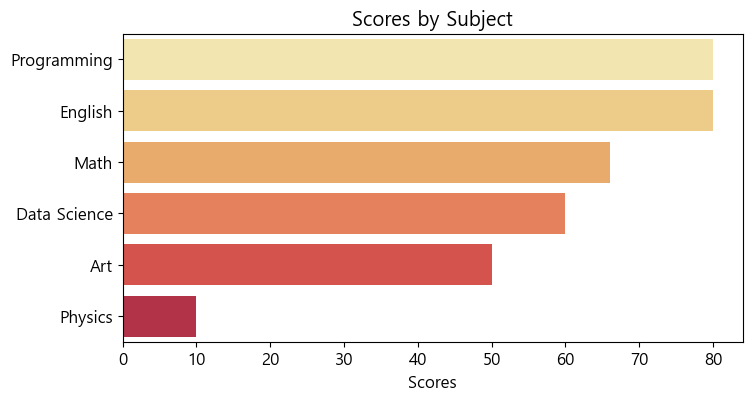

In [40]:
subject_s = [item[0] for item in data]
score_s = [item[1] for item in data]

# x, y 축 대입값을 바꿔서 표현
sns.barplot(x=score_s, y=subject_s, alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

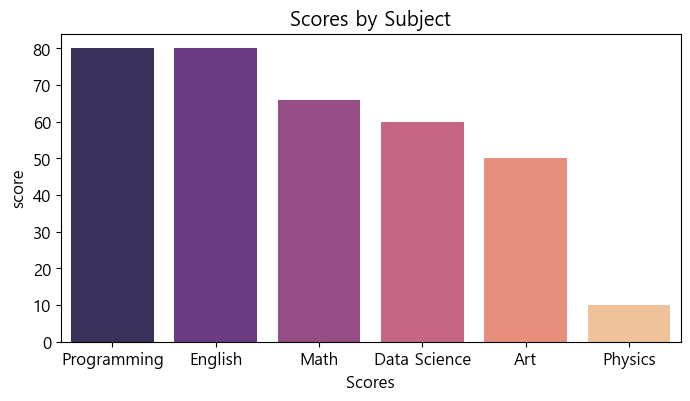

In [45]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]
seaborn_bar = pd.DataFrame(zip(subject, score), columns=["subject", "score"])
seaborn_bar = seaborn_bar.sort_values(by="score", ascending=False)
# print(seaborn_bar)

# x, y 축 대입값을 바꿔서 표현
sns.barplot(x=seaborn_bar["subject"], y=seaborn_bar["score"], alpha=0.9, palette='magma')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

### 2-3 Barplot 비교 그래프 그리기
두 학생의 과목별 성적 비교하기
**axes.bar(x, height, width=0.8, bottom=None, align='center', **kwargs)**

- x: 막대 그래프의 x 좌표. 보통은 범주 혹은 카테고리의 값들을 의미함
- height: 막대의 높이를 지정하는 값, 보통은 해당 범주에 대한 데이터 값이 사용
- width (선택적): 막대의 너비를 지정하는 값. 기본값은 0.8임
- bottom (선택적): 막대의 시작 위치를 지정하는 값. 기본적으로 막대는 0부터 시작
- align (선택적): 막대의 정렬 방식을 지정하는 값.
    - 'center', 'edge' 또는 'align' 중 하나를 선택
    - 기본값은 'center'
- **kwargs: 기타 추가적인 옵션들을 지정할 수 있는 매개변수
    - 예를 들어, 색상, 투명도, 라벨 등을 설정할 수 있음

In [43]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score1 = [66, 80, 60, 50, 80, 10]
score2 = [55, 90, 40, 60, 70, 20]

# subject 갯수 만큼 숫자리스트 생성(0~5)
sj_num = np.arange(len(subject))

In [44]:
sj_num-0.4/2

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8])

In [46]:
# 넓이 지정, default=0.8
width = 0.4
sj_num + width/2

array([0.2, 1.2, 2.2, 3.2, 4.2, 5.2])

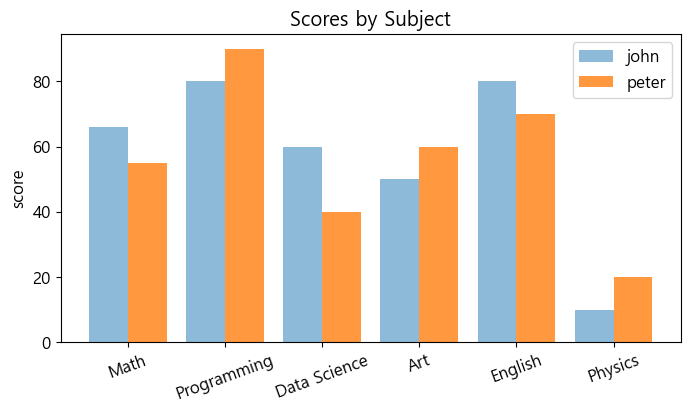

In [47]:
# 넓이 지정, default=0.8
width = 0.4

# subplots 생성
fig, axes = plt.subplots()

# 막대 그래프를 생성하는 역할
# axes.bar(x좌표, height, width=0.8, bottom=None, align='center', **kwargs)
axes.bar(sj_num - width/2, score1, width, align='center', alpha=0.5)
axes.bar(sj_num + width/2, score2, width, align='center', alpha=0.8)

# xtick 설정
axes.set_xticks(sj_num)
axes.set_xticklabels(subject)

plt.ylabel('score')
plt.title('Scores by Subject')

plt.xticks(rotation=20)
plt.legend(['john', 'peter'])

plt.show()

#### matplotlib 다중 barh 차트

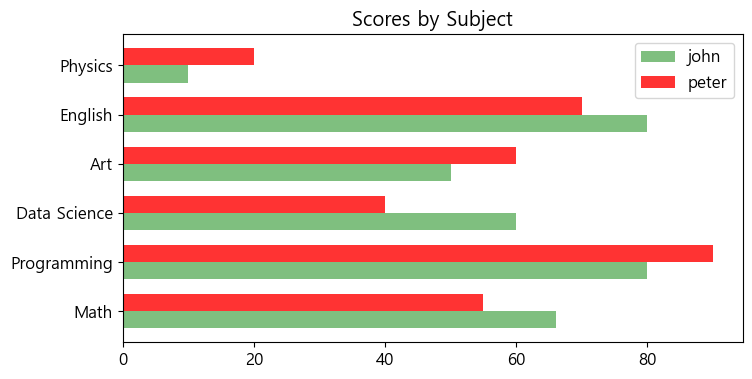

In [51]:
# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(sj_num - width/2, score1, width, align='center', alpha=0.5, color='green')
axes.barh(sj_num + width/2, score2, width, align='center', alpha=0.8, color='red')

# ytick 설정
axes.set_yticks(sj_num)
axes.set_yticklabels(subject)

plt.title('Scores by Subject')
plt.legend(['john', 'peter'])

plt.show()

#### Seaborn에서 barplot 비교 차트 그리기
- 카테고리 값에 따른 실수 값의 평균과 편차를 표시함
- 편차 표시 : error bar로 표시

**실전 tip.**

- 그래프를 임의로 그려야 하는 경우 -> <span style="background-color:#FFFFF0"> matplotlib </span>

- DataFrame을 가지고 그리는 경우 -> <span style="background-color:#FFFFF0"> seaborn </span>

seaborn 에서는<span style="background-color:#FFFFF0">  hue </span>
 옵션으로 매우 쉽게 비교 **barplot**을 그릴 수 있음

#### tips 데이터 활용

In [52]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)

In [53]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[tip] : error line 또는 error bar

- 막대의 편차를 표시한 것
- 설정 : default 3  
    sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=2)
- 없애고 싶으면   
    sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=0)

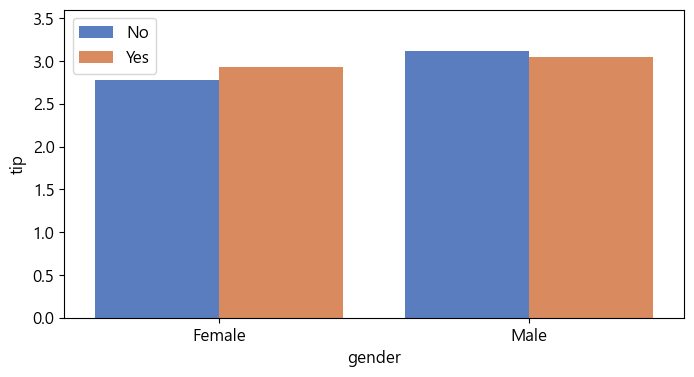

In [57]:
# 성별로 담배를 피는 사람과 안피는 사람별로 tip의 평균 비교

# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted")
# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=3)
# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=1)
sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=0)
plt.legend(loc="best")
plt.show()

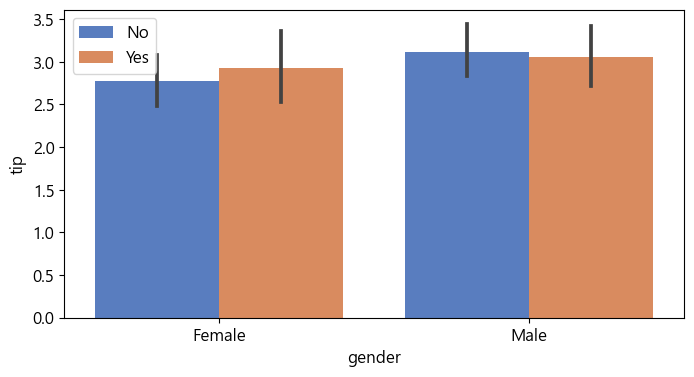

In [58]:
sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted")
plt.legend(loc="best")
plt.show()

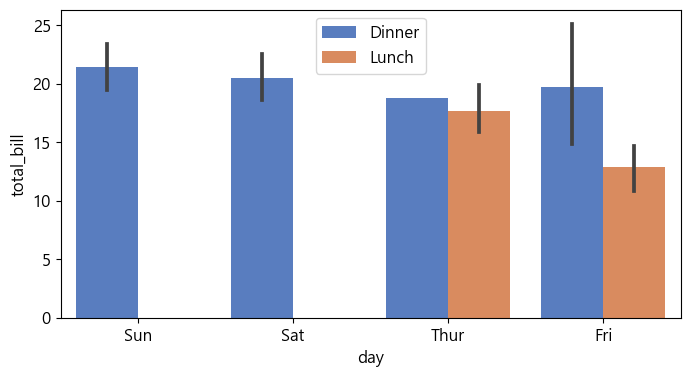

In [65]:
sns.barplot(data=tips, x='day', y='total_bill', hue='time', palette="muted")
plt.legend(loc="best")
plt.show()

#### titanic 데이터 활용

In [60]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


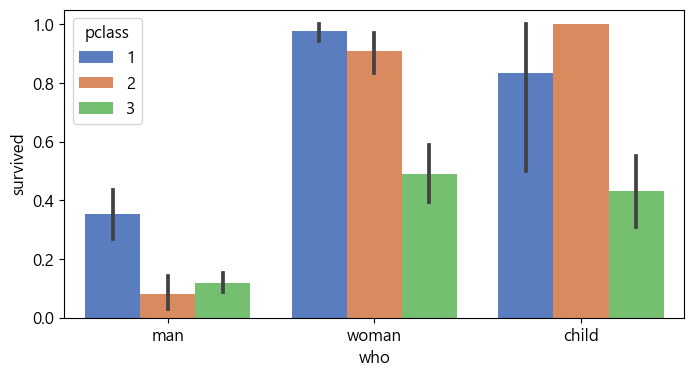

In [67]:
sns.barplot(x='who', y='survived', hue='pclass', data=titanic, palette="muted")
plt.show()

## 3. Line Plot
### 3-1. 기본 lineplot 그리기

#### tips 데이터 활용

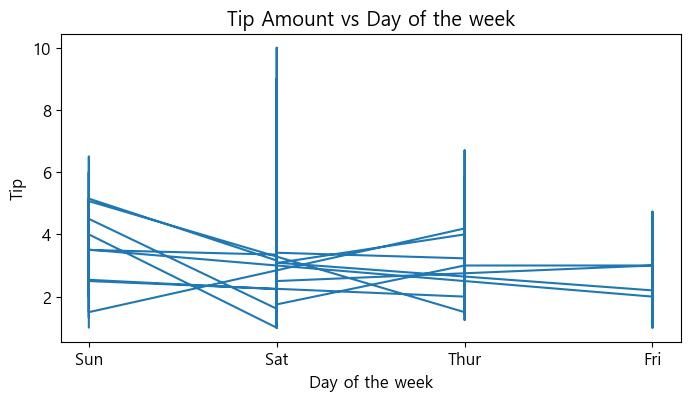

In [72]:
# 라인 플롯 그리기
plt.plot(tips["day"], tips["tip"])
# sns.lineplot(data=tips, x='day', y='tip')
plt.xlabel('Day of the week')
plt.ylabel('Tip')
plt.title('Tip Amount vs Day of the week')
plt.show()

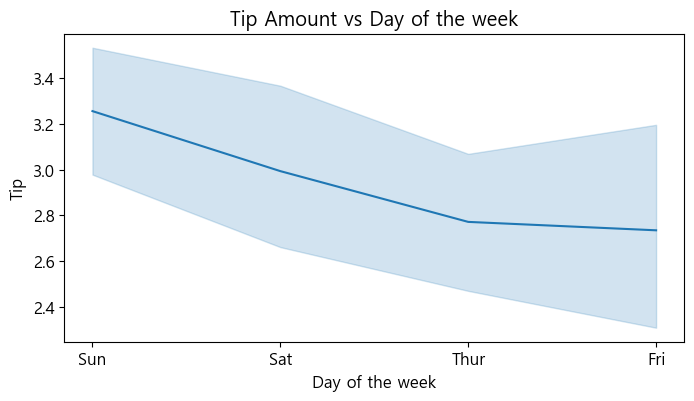

In [74]:
# 라인 플롯 그리기
# sns.lineplot(data=tips, x='day', y='tip', ci=None)
sns.lineplot(data=tips, x='day', y='tip')
plt.xlabel('Day of the week')
plt.ylabel('Tip')
plt.title('Tip Amount vs Day of the week')
plt.show()

- 진한 실선 : 평균
- 음영 표시 부분(ci) : 신뢰 구간(confidence interval)의 표시 여부를 조절하는 역할
    - ci를 명시하지 않으면 : 95% 신뢰구간을 표시함
    - ci= None : 신뢰 구간을 표시하지 않음
    - ci= "sd": 표준 편차를 기반으로 한 신뢰 구간 표시
    - ci= int: 신뢰구간을 숫자로 표시

[해설]

- 말인 토요일과 일요일에 팁이 상대적으로 높은 것을 확인할 수 있음  
: 이는 주말에 식사를 즐기는 사람들이 더 많은 팁을 주는 경향이 있음을 시사함

### 3-2. 2개 이상의 그래프 그리기

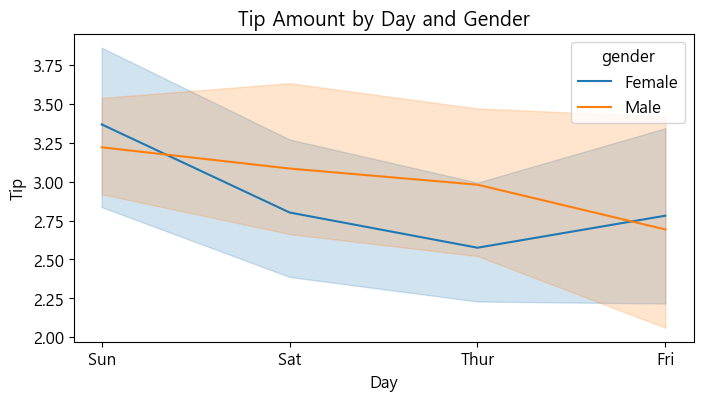

In [75]:
# 다중 라인 플롯 그리기
# sns.lineplot(data=tips, x='day', y='tip', hue='gender', ci=None)
sns.lineplot(data=tips, x='day', y='tip', hue='gender')
# sns.lineplot(data=tips, x='day', y='tip', hue='gender')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Tip Amount by Day and Gender')
plt.show()

#### flights 데이터 활용

In [76]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

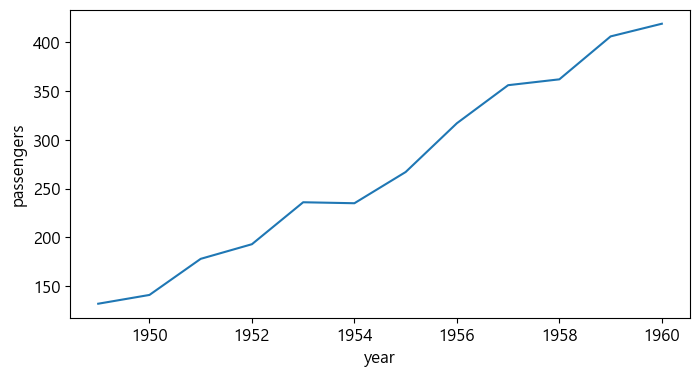

In [82]:
may_flights = flights.query("month == 'Mar'")
sns.lineplot(data=may_flights, x="year", y="passengers")

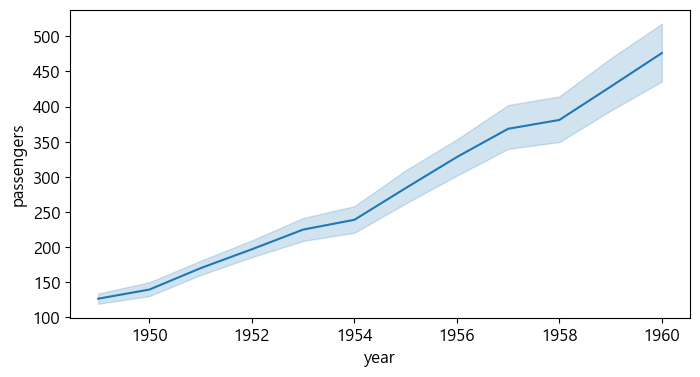

In [83]:
sns.lineplot(data=flights, x="year", y="passengers")

plt.show()

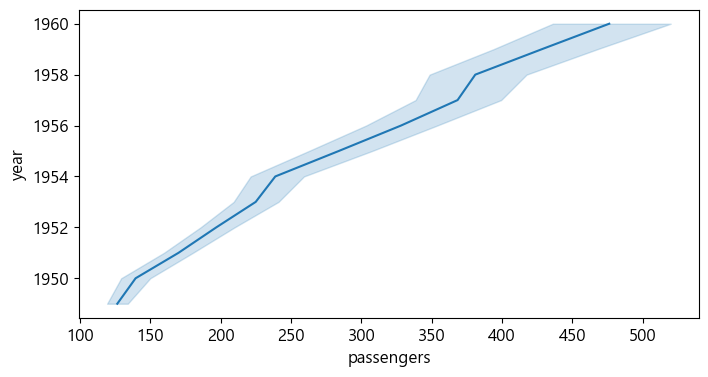

In [84]:
sns.lineplot(data=flights, x="passengers", y="year", orient="y")

plt.show()

In [85]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


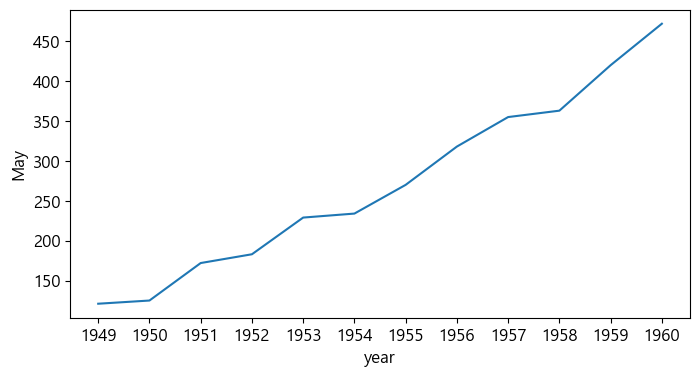

In [86]:
sns.lineplot(data=flights_wide["May"])

plt.xticks(flights_wide.index)
plt.show()


In [87]:
flights_wide.index

Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960], dtype='int64', name='year')

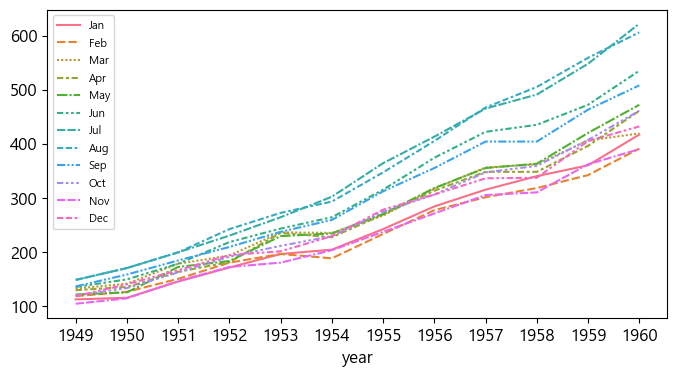

In [88]:
# 년도별 월별 비행 횟수 확인
sns.lineplot(data=flights_wide)
# plt.legend(loc="best")
plt.legend(loc="best", prop={'size': 8})
plt.xticks(flights_wide.index)
plt.show()

<Axes: xlabel='year', ylabel='passengers'>

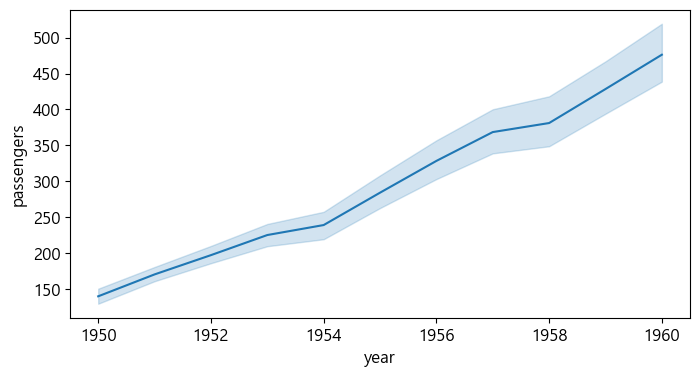

In [90]:
may_flights = flights.query("year > 1949")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [91]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

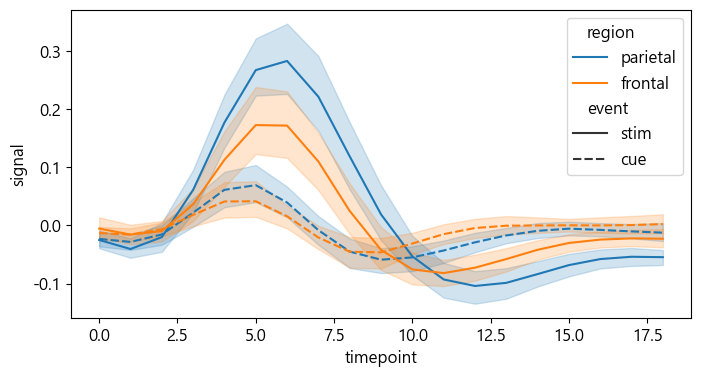

In [92]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")

<Axes: xlabel='timepoint', ylabel='signal'>

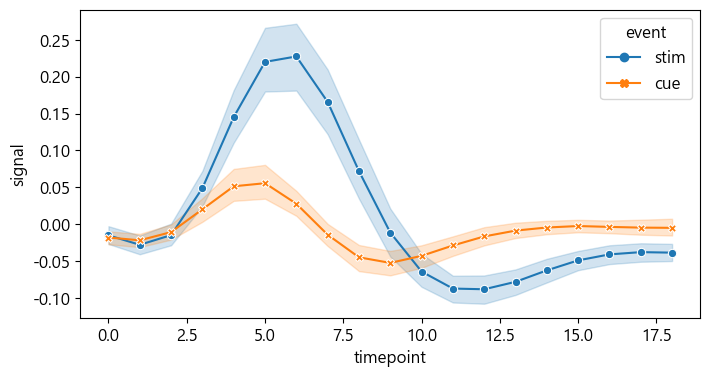

In [93]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

<Axes: xlabel='timepoint', ylabel='signal'>

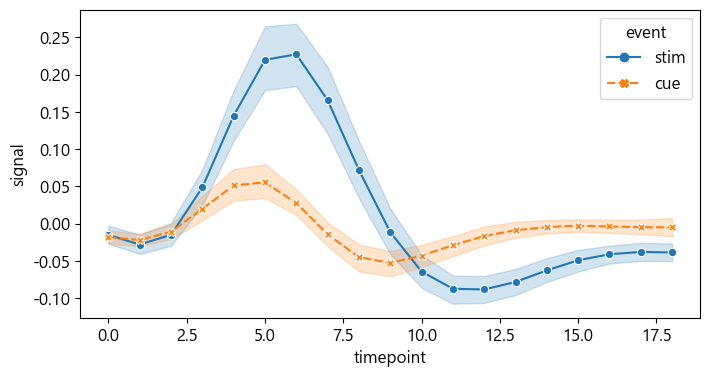

In [94]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=True
)

<Axes: xlabel='timepoint', ylabel='signal'>

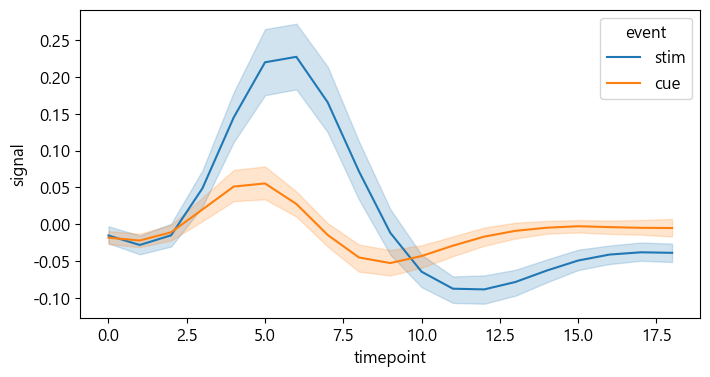

In [95]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=False, dashes=False
)

<Axes: xlabel='timepoint', ylabel='signal'>

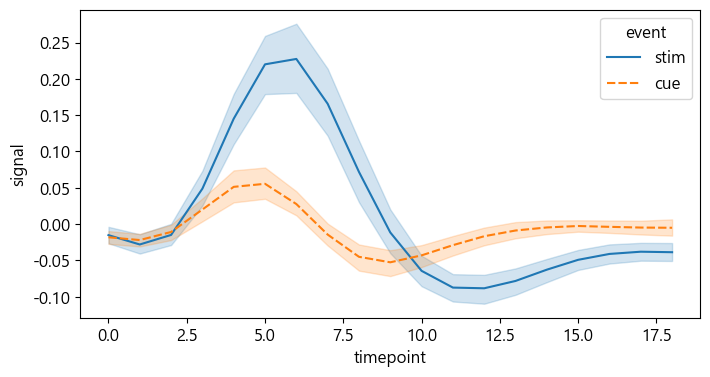

In [96]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=False, dashes=True
)

<Axes: xlabel='timepoint', ylabel='signal'>

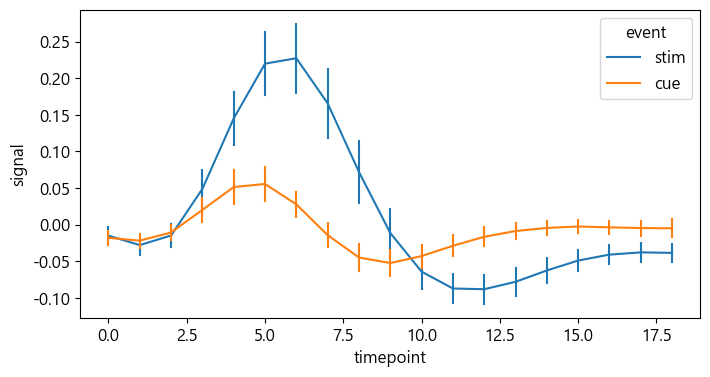

In [97]:
# err_style="bars" : # 오차 막대 그래프 표시
# errorbar=("se", 2) :막대 그래프 계산할 때 표준오차로 계산하고, 크기는 2로 표시

sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("se", 2),
)

## 5. Histogram

### 5-1. 기본 Histogram 그리기

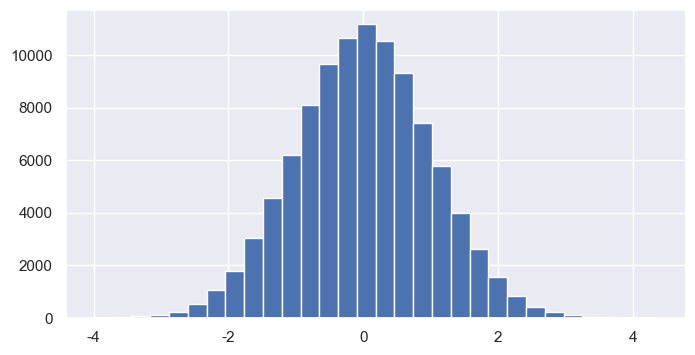

In [128]:
N = 100000
bins = 30

x = np.random.randn(N)

plt.hist(x, bins=bins)

plt.show()

<Axes: >

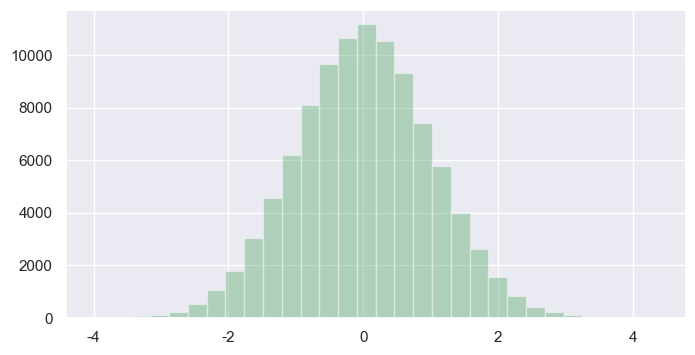

In [129]:
sns.distplot(x, bins=bins, kde=False, hist=True, color='g')

<Axes: xlabel='Density'>

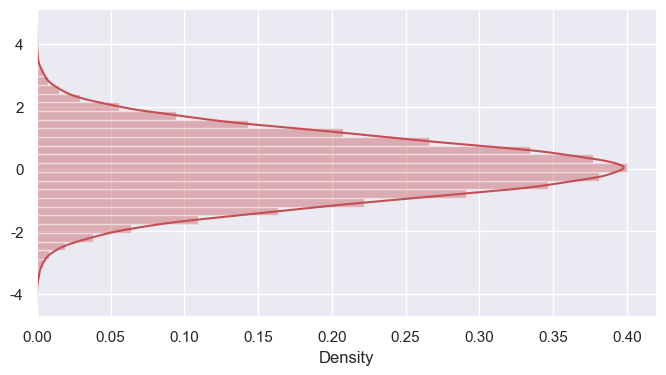

In [130]:
sns.distplot(x, bins=bins, kde=True, hist=True, vertical=True, color='r')

- sharey: y축을 다중 그래프가 share
- tight_layout: graph의 패딩을 자동으로 조절해주어 fit한 graph를 생성

## 6. Pie Chart

**pie chart 옵션**

- explode: 파이에서 툭 튀어져 나온 비율
- autopct: 퍼센트 자동으로 표기
- shadow: 그림자 표시
- startangle: 파이를 그리기 시작할 각도

texts, autotexts 인자를 리턴 받습니다.

**texts**는 label에 대한 텍스트 효과를

**autotexts**는 파이 위에 그려지는 텍스트 효과를 다룰 때 활용합니다.

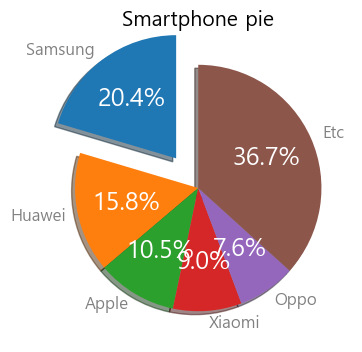

In [110]:
labels = ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'Oppo', 'Etc']
sizes = [20.4, 15.8, 10.5, 9, 7.6, 36.7]
explode = (0.3, 0, 0, 0, 0, 0)

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용합니다
patches, texts, autotexts = plt.pie(sizes, 
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=90)

plt.title('Smartphone pie', fontsize=15)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(12)
    t.set_color('gray')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(18)

plt.show()

Seaborn에서는 **pie plot을 지원하지 않습니다.**

## 7. Box Plot

샘플 데이터를 생성합니다.

In [111]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
data

array([ 54.48698356,  16.16874488,  26.84332268,   0.68734353,
        72.42964678,  11.94629966,  46.64326946,  70.03110608,
        41.57857582,  54.58007468,  84.20767533,  64.26489602,
        61.35883027,  37.53310316,   8.25332206,  10.52907568,
        76.21599284,  34.95400165,  58.99020491,  91.59425081,
        16.160754  ,  52.20878972,  54.70093275,  16.28726914,
        47.71707621,  90.58448522,  47.26800341,  82.64584755,
        58.01841391,  96.93770789,  75.43174907,  92.32892376,
        74.54385792,  30.90976909,  82.9966002 ,  95.88484301,
        26.81926029,  69.90927492,  91.73854886,  70.0538408 ,
        47.25343575,  37.34516969,  26.50910989,  52.61726595,
        48.0683895 ,  18.64215505,  60.35579852,  50.07053081,
        55.33992796,  86.63963636,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.  

### 7-1 기본 박스플롯 생성

#### matplotlib로 boxplot 표현

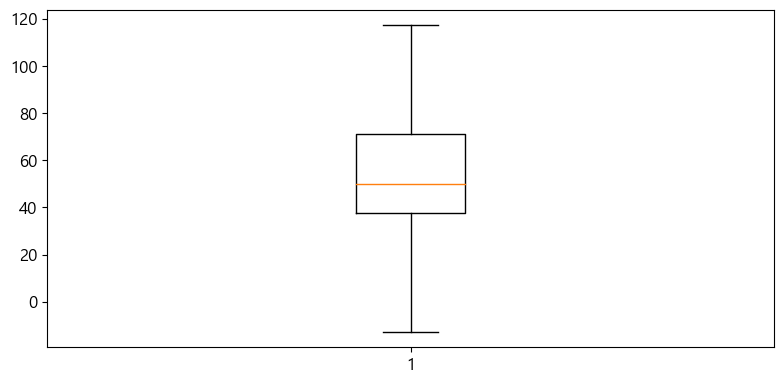

In [112]:
plt.boxplot(data, showfliers=False)
plt.tight_layout()
plt.show()

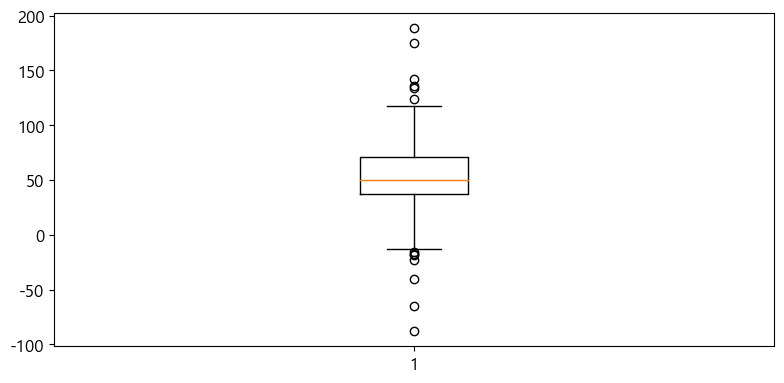

In [113]:
plt.boxplot(data)
plt.tight_layout()
plt.show()

#### seaborn으로 boxplot 표현

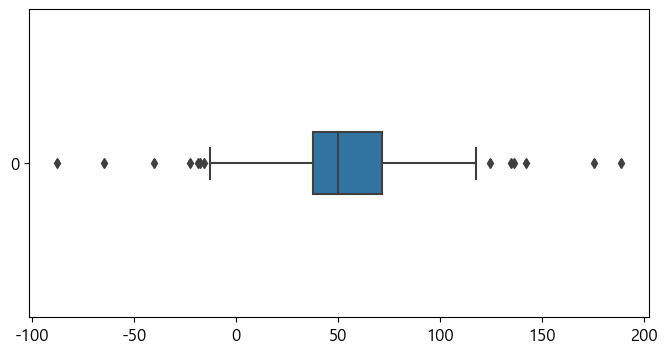

In [114]:
# 수직방향
# sns.boxplot(data, orient='v', width=0.2)
# 수평방향
sns.boxplot(data, orient='h', width=0.2)
plt.show()

### 7-2. 다중 박스플롯 생성
seaborn에서 boxplot을 그릴 때는DataFrame을 가지고 그릴 때 주로 활용함

**barplot**과 마찬가지로, 용도에 따라 적절한 라이브러리를 사용합니다.

**실전 tip.**

- 그래프를 임의로 그려야 하는 경우 -> matplotlib
- DataFrame을 가지고 그리는 경우 -> seaborn

seaborn 에서는 hue 옵션으로 매우 쉽게 비교 **boxplot**을 그릴 수 있음

#### tips 데이터 활용

In [115]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


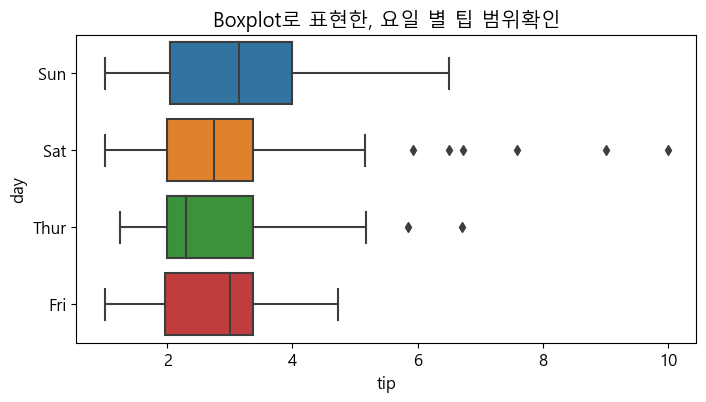

In [116]:
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="tip", y="day")
plt.show()

x, y축 방향 바꾸기

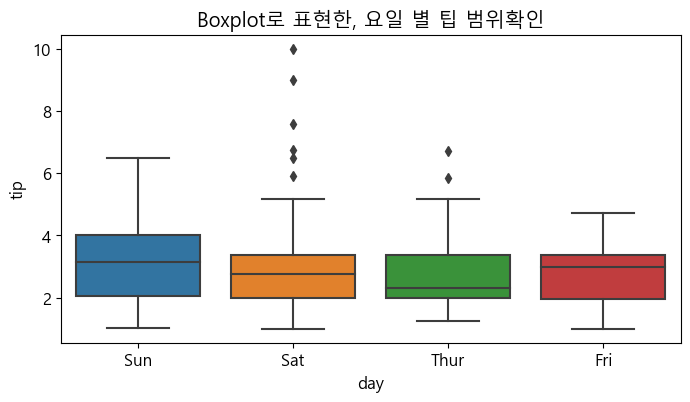

In [117]:
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="day", y="tip")
plt.show()

이상치 표현 무사히기 whis=np.inf

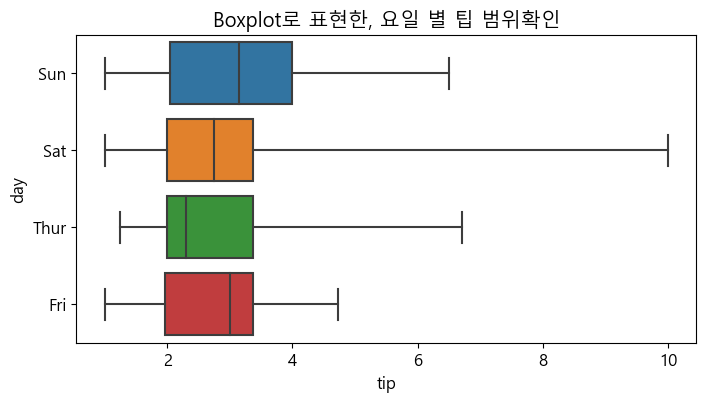

In [118]:
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="tip", y="day", whis=np.inf)
plt.show()

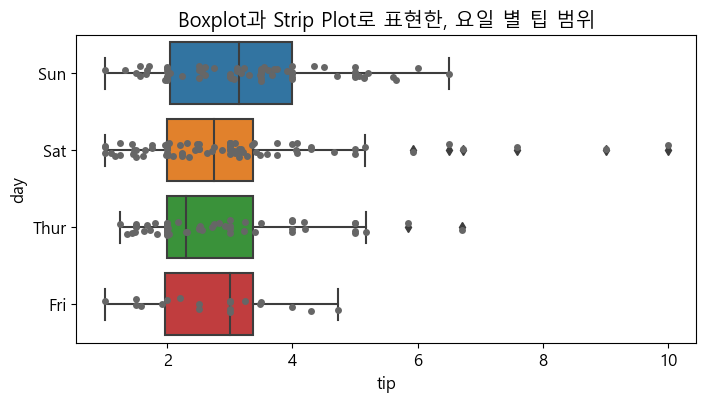

In [119]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁 범위")
# sns.boxplot(data=tips, x="tip", y="day", whis=np.inf)
sns.boxplot(data=tips, x="tip", y="day")
sns.stripplot(data=tips, x="tip", y="day", jitter=True, color="0.4")
plt.show()

### titanic 데이터 활용

In [120]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


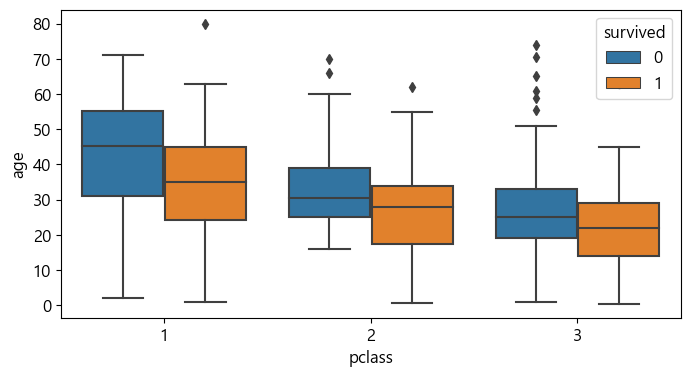

In [121]:
sns.boxplot(data=titanic, x='pclass', y='age', hue='survived')
plt.show()

### 7-3. Box Plot 축 바꾸기

**vert=False** 옵션을 통해 표시하고자 하는 축을 바꿀 수 있습니다.


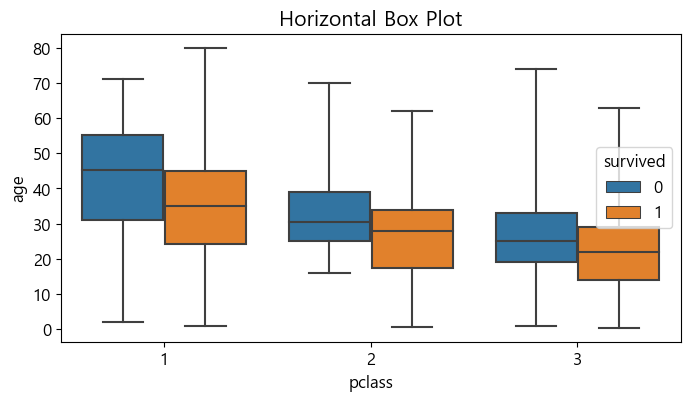

In [122]:
plt.title('Horizontal Box Plot', fontsize=15)
sns.boxplot(data=titanic, x='pclass', y='age', hue='survived',  whis=np.inf)
plt.show()

#### violinplot과 swarmplot으로 표현하기

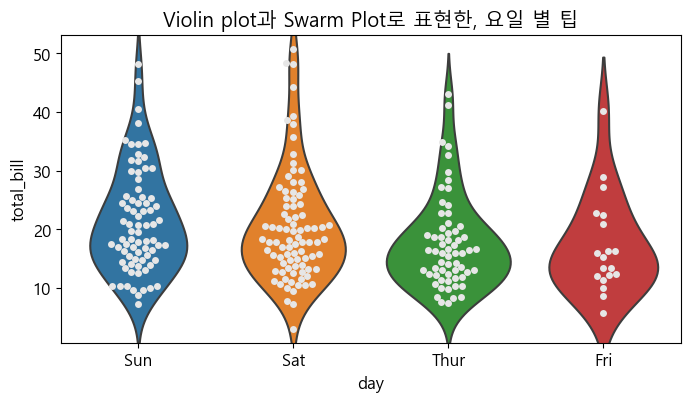

In [123]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

## 8. imshow
이미지(image) 데이터와 유사하게 행과 열을 가진 2차원의 데이터를 시각화 할 때는 <span style="background-color:#FFFFF0"> imshow </span>
를 활용합니다.



In [125]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images[:10]
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- <span style="background-color:#F5F5F5"> load_digits </span>는 0~16 값을 가지는 array로 이루어져 있습니다.

- 1개의 array는 8 X 8 배열 안에 표현되어 있습니다.

- 숫자는 0~9까지 이루어져있습니다.

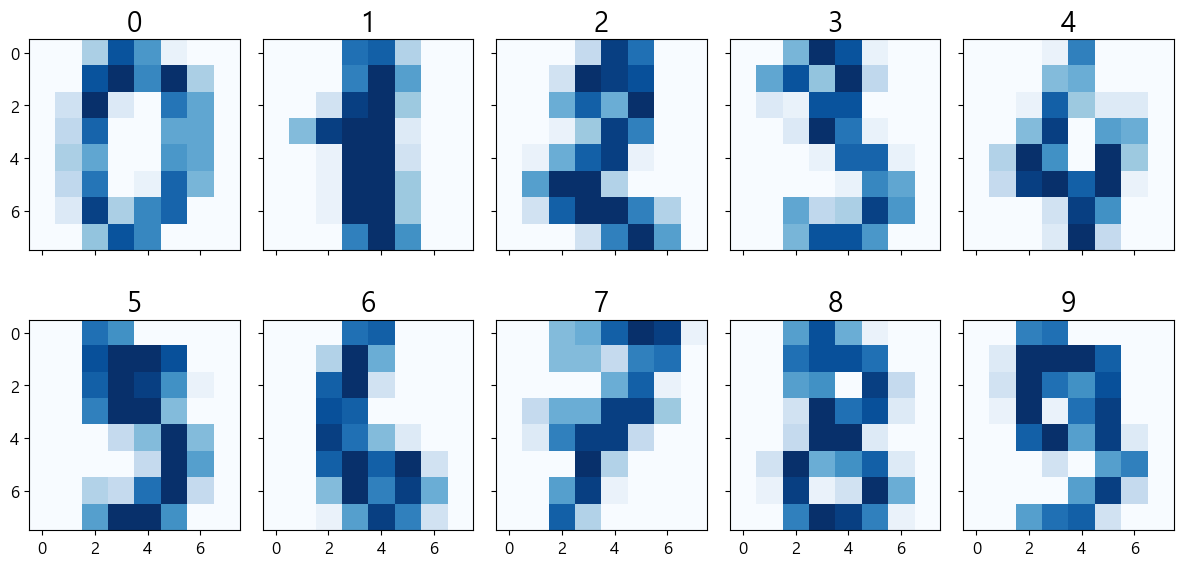

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, figsize=(12, 6), sharey=True)

for i in range(10):
    axes[i//5][i%5].imshow(X[i], cmap='Blues')
    axes[i//5][i%5].set_title(str(i), fontsize=20)
    
plt.tight_layout()
plt.show()